### Preparation

#### 1.1 Import library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from forecast.class_Forecast_Model import Forecast_Model
from create_database.class_ETL import ETL 

pd.options.display.float_format = '{:,}'.format
pd.options.display.max_columns = 100


In [2]:
###########################################################################################################################################################################################################################################
##  What can triendt can do for you? let type: triendt and the dot like "triendt."    
##                                                                                                                                               
##  As you can see, triendt has 4 functions which are:                                                                                                                                                                               
##      1. triendt.extract_bigquery_data(start_date=, table_name= )                                                                                                                                                                  
##      2. triendt.extract_local_data(table_name=)                                                                                                                                                                                   
##      3. triendt.ingest_data_to_sqlite(data_ingest=, table_name=)                                                                                                                                                                  
##      4. triendt.auto_ingest_data(table_name=)                                                                                                                                                                                     
###########################################################################################################################################################################################################################################
## 1. function extract_bigquery_data
##    >> extract data from an sql file, which is saved in create_database folder.  If you want to extract another table, create a file contains sql script, save it with the table_name.sql and store it in create_database folder
##    >> start_date is the date that you want to view
##    >> table_name is the name of the file, you can think of a sql file like a metabase card withou filter anything.
## 
## 2. function extract_local_data
##    >> extract data from fa_database.db file, you can check it out at this link (https://sqliteviewer.app/) to see which table already exists in local db
##    >> table_name is the name of table already has data locally   
##
## 3. ingest_data_to_sqlite 
##    >> use to insert data local, avoid being updated lately.
##    >> table_name is the name of table already has data locally   
## Note: Carefully when use it funcion, because this function allow use insert data without check out whether new data to insert already exist in DB. As a result, data could be duplicated, and downstreaming purpose would be incorect.
##
## 4. auto_ingest_data
##    >> use this function to update data in database locally without being afraid of data duplicate
##    >> data will be updated with current date - 1 day. 
############################################################################################################################################################################################################################################

#### 1.2 Create udf - user defined function

In [2]:
def filter_data_input(df, frc_value, cond):
    
    # fitler your df
    if cond:
        for _key, _values in cond.items():
            df = df[df[_key] == _values ]
    
    df_pivot = df.groupby(['complete_date'],as_index = False)[frc_value].sum()
    df_pivot.sort_values('complete_date',inplace= True)

    return df_pivot

### Forecast

In [3]:
# call triendt to handle import, export data
triendt = ETL(credentials_file_path= './../_config/cred.json',
              local_database= './../_data_raw/fa_database.db'
              )

In [15]:
df_bigquery_data = triendt.extract_bigquery_data(start_date= '2024-04-01', table_name= 'fct_fa_pnl_mini')
df_bigquery_data

,complete_date,province,service_type,customer_type,partner,project,gsv_excluded_vat,stoppoint,aha_revenue
0,2024-04-01,sgn,bike,sme,84362509661,core,"34,259.25925925926",1.0,"7,592.59259259259"
1,2024-04-01,han,bike,sme,84369305755,core,"75,925.92592592593",3.0,"15,185.18518518518"
2,2024-04-01,han,bike,sme,84832639000,core,"47,222.22222222222",1.0,"10,185.185185185182"
3,2024-04-01,sgn,bike,sme,84768931420,core,"20,370.370370370372",1.0,"20,370.37037037037"
4,2024-04-01,han,bike,sme,84366688368,core,"73,148.14814814815",1.0,"15,370.370370370365"
...,...,...,...,...,...,...,...,...,...
1021472,2024-04-25,han,bike,sme,84389141595,core,"50,814.81481481482",2.0,"9,999.999999999996"
1021473,2024-04-25,han,bike,sme,84982009985,core,"25,000.0",1.0,"4,999.999999999999"
1021474,2024-04-25,sgn,bike,sme,84938113615,core,"25,000.0",1.0,"4,999.999999999999"
1021475,2024-04-25,sgn,bike,sme,84355600405,core,"25,000.0",1.0,"4,999.999999999999"


##### 2.1 Check if historical data exists 
* If your local database is not update data yet. Just use function auto_updat_data above

In [6]:
df_fa_pnl_mini = triendt.extract_local_data(table_name='fct_fa_pnl_mini')
df_fa_pnl_mini

,complete_date,province,service_type,customer_type,partner,project,gsv_excluded_vat,stoppoint,aha_revenue,created_at
0,2021-01-01,sgn,bike,sme,84933327916,core,"22,540.0",1.0,"4,139.999999999999",2024-04-26 04:59:28
1,2021-01-01,han,bike,sme,84911666693,core,"49,980.0",1.0,"9,179.999999999998",2024-04-26 04:59:28
2,2021-01-01,sgn,bike,sme,84972500100,core,"49,980.0",2.0,"9,179.999999999998",2024-04-26 04:59:28
3,2021-01-01,han,bike,sme,84384379071,core,"22,540.0",1.0,"4,139.999999999999",2024-04-26 04:59:28
4,2021-01-01,han,bike,sme,84378234995,core,"28,420.0",1.0,"5,219.999999999999",2024-04-26 04:59:28
...,...,...,...,...,...,...,...,...,...,...
1250899,2024-04-25,han,bike,sme,84985312539,core,"21,296.296296296296",1.0,"4,999.999999999999",2024-04-26 05:07:07
1250900,2024-04-25,han,bike,sme,84909897987,core,"21,296.296296296296",1.0,"4,999.999999999999",2024-04-26 05:07:07
1250901,2024-04-25,sgn,bike,sme,84348002718,core,"21,296.296296296296",1.0,"4,999.999999999999",2024-04-26 05:07:07
1250902,2024-04-25,han,bike,sme,84973051169,core,"21,296.296296296296",1.0,"4,999.999999999999",2024-04-26 05:07:07


In [5]:
## to delete all data and update whole table, choose update_type = 'update_as_new'
triendt.auto_update_data(table_name='fct_fa_pnl_mini', update_type='append')

Update data sucessfully !!!


##### 2.2 Input filter condition below and change your df name with condition.

In [6]:
filter_conditions = {"province": "han",
                     "service_type": "truck",
                     }

df_historical_data = filter_data_input(df= df_fa_pnl_mini,frc_value= 'gsv_excluded_vat', cond= filter_conditions)

print('''Your historical data:''')

df_historical_data.head()

Your historical data:


,complete_date,gsv_excluded_vat
0,2021-07-28,"8,946,420.0"
1,2021-07-29,"15,134,140.0"
2,2021-07-30,"14,596,120.0"
3,2021-07-31,"16,433,620.0"
4,2021-08-01,"5,608,540.0"


In [7]:
### call forecast model
forecast_gsv_bike_sgn = Forecast_Model(historical_data=df_historical_data,
                                      date_column='complete_date',
                                      forecast_value= 'gsv_excluded_vat',
                                      )

### forecast for the next 365 days
df_forecast = forecast_gsv_bike_sgn.call_forecast_model(no_of_days_forecast= 365)
df_forecast

17:54:04 - cmdstanpy - INFO - Chain [1] start processing
17:54:04 - cmdstanpy - INFO - Chain [1] done processing


,date,forecast_value,forecast_lower,forecast_upper,trend
0,2021-07-28,"16,103,269.762121757","716,365.919429683","31,284,969.42123025","15,175,741.70285697"
1,2021-07-29,"16,415,840.648757229","7,687.9299436249785","31,792,208.254562512","15,208,205.00632752"
2,2021-07-30,"18,404,119.8391753","1,633,606.9897417314","34,293,433.0820617","15,240,668.309798071"
3,2021-07-31,"14,697,168.024408609","-1,521,306.1223565713","30,875,647.33508061","15,273,131.613268623"
4,2021-08-01,"395,599.7977869585","-14,665,804.578539995","15,581,288.135096855","15,305,594.916739173"
...,...,...,...,...,...
1345,2025-04-09,"169,554,371.05004674","152,006,207.5852136","188,548,872.18122798","172,900,844.0955035"
1346,2025-04-10,"169,986,654.84897932","152,521,088.74022347","188,183,697.80751243","173,107,715.32494542"
1347,2025-04-11,"172,077,638.9151762","153,625,717.20763433","190,766,407.19920895","173,314,586.55438736"
1348,2025-04-12,"168,455,173.77504435","150,486,931.82903555","185,842,912.60429737","173,521,457.78382927"


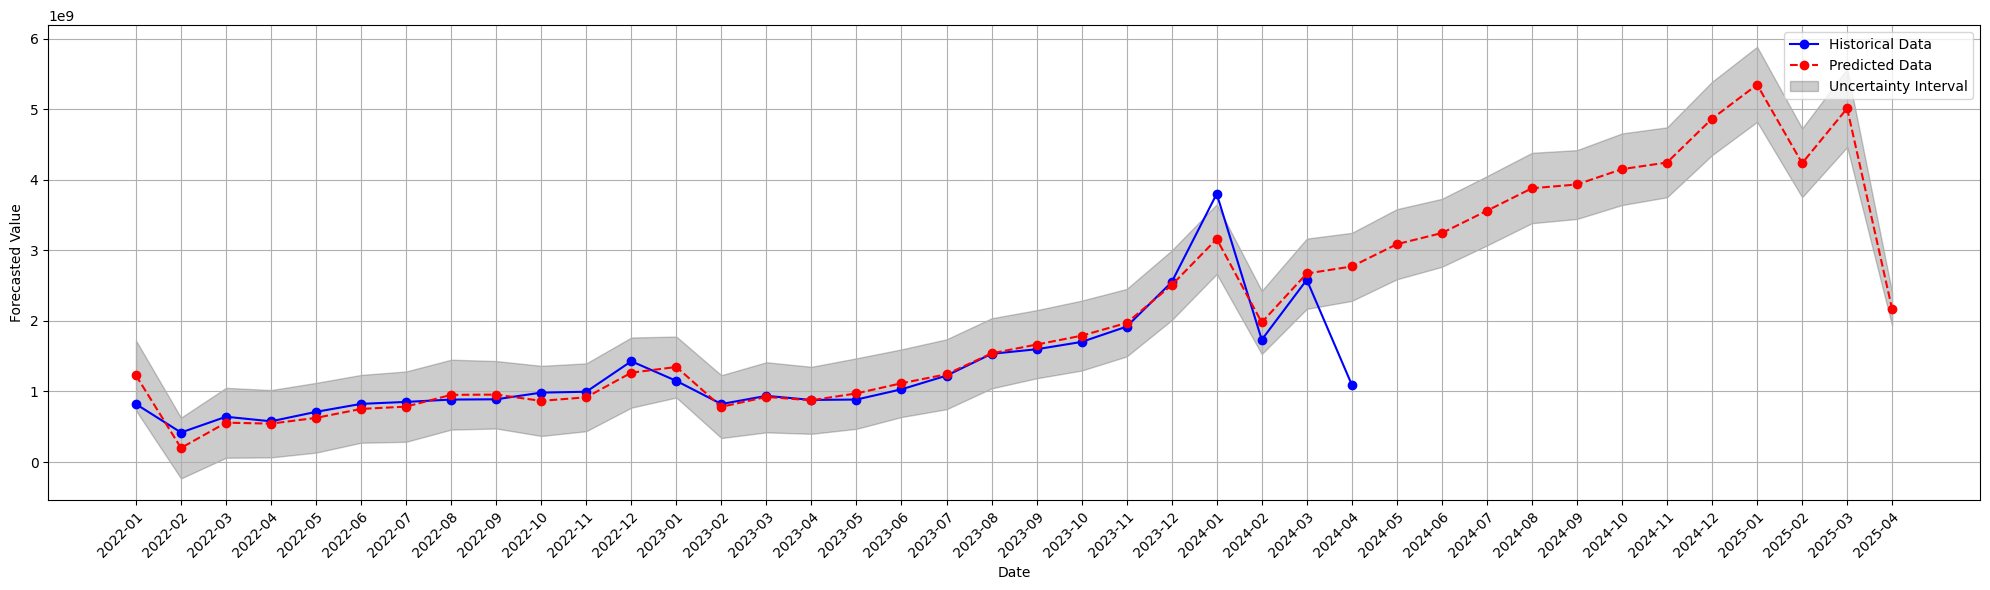

In [8]:
forecast_gsv_bike_sgn.resample_and_plot_data(df_forecast=df_forecast,start_date='2022-01-01')


### Export data
* call funtion export_data, provide dataframe, file type (excel or csv) and file name

In [9]:
# forecast_gsv_bike_sgn.export_data(df=df_forecast,file_name='gsv_bike_sgn',file_type='excel')
forecast_gsv_bike_sgn.export_data(df=df_forecast,file_name='gsv_truck_sgn',file_type='csv')

Export data sucessfully!
